# Iris Data Classification using Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# import iris dataset

In [2]:
iris = pd.read_csv('datasets/Iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Change Species Name to Numbers

In [7]:
iris = iris.replace(to_replace ="Iris-setosa",          value = 0) 
iris = iris.replace(to_replace ="Iris-versicolor",      value = 1) 
iris = iris.replace(to_replace ="Iris-virginica",       value = 2)

In [8]:
X = iris.drop('species', axis=1)
y = iris['species']

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Split Dataset into Train/Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train Gaussian Naive bayes

In [11]:
gaussian_nb = GaussianNB()

In [12]:
gaussian_nb.fit(X_train, y_train)

GaussianNB()

# Evaluate The model

In [13]:
y_pred = gaussian_nb.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [15]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

Text(33.0, 0.5, 'Predicted values')

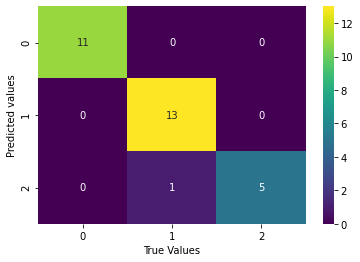

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'viridis', annot = True)
plt.xlabel('True Values')
plt.ylabel('Predicted values')